In [46]:
import os
import re
import time
import glob
import uproot
import argparse
import numpy as np
from pathlib import Path
from matplotlib import pyplot

In [2]:
pyplot.rcParams['figure.figsize'] = (20, 15)
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['grid.linestyle'] = ':'

In [45]:
work_dir = '/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality'

quality_cuts = {
    'transmission': 0.7,
    'rate': 100,
    'nstar': 15
}

# Get the input paths

In [4]:
data_mask = f'{work_dir}/data/*/Out.root'

paths_list = glob.glob(data_mask)
paths_list.sort()

In [5]:
paths_list

['/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_11_17/Out.root',
 '/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_11_18/Out.root',
 '/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_11_19/Out.root',
 '/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_11_20/Out.root',
 '/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_12_07/Out.root',
 '/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_12_13/Out.root',
 '/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_12_15/Out.root',
 '/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_12_22/Out.root',
 '/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/d

# Check the data quality

### Define some functions to plot the quality:

In [25]:
def plot_zeniths(obs_ids, zeniths):
    
    pyplot.xlabel('Run number')
    pyplot.ylabel('Zenith angle [deg]')
    pyplot.ylim(0, 90)
    
    pyplot.plot(obs_ids, zeniths, marker='o', linewidth=1, markersize=10)

    pyplot.grid()

In [28]:
def plot_transmissions(obs_ids, transmissions, cut_value):

    pyplot.xlabel('Run number')
    pyplot.ylabel('Transmission @ 9km')
    pyplot.ylim(0, 1)

    pyplot.plot(obs_ids, transmissions, marker='o', linewidth=1, markersize=10)

    pyplot.plot(
        pyplot.xlim(), (cut_value, cut_value), 
        linewidth=2, linestyle='--', color='grey', label=f'Transmission = {cut_value}'
    )

    pyplot.grid()
    pyplot.legend()

In [30]:
def plot_rates(obs_ids, rates, cut_value):
    
    pyplot.xlabel('Run number')
    pyplot.ylabel('L3 rate [Hz]')
    pyplot.ylim(0, 600)

    pyplot.plot(obs_ids, rates, marker='o', linewidth=1, markersize=10)

    pyplot.plot(
        pyplot.xlim(), (cut_value, cut_value), 
        linewidth=2, linestyle='--', color='grey', label=f'Rate = {cut_value}'
    )

    pyplot.grid()
    pyplot.legend()

In [31]:
def plot_nstars(obs_ids, nstars, cut_value):
    
    pyplot.xlabel('Run number')
    pyplot.ylabel('Number of stars')
    pyplot.ylim(0, 60)

    pyplot.plot(obs_ids, nstars[1], marker='o', linewidth=1, markersize=10, label='MAGIC-I')
    pyplot.plot(obs_ids, nstars[2], marker='o', linewidth=1, markersize=10, label='MAGIC-II')

    pyplot.plot(
        pyplot.xlim(), (cut_value, cut_value), 
        linewidth=2, linestyle='--', color='grey', label=f'Nstars = {cut_value}'
    )

    pyplot.grid()
    pyplot.legend()

### Check the data quality:


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_11_17/Out.root
Observation IDs: [5093152]
--> [False]
good runs = 0, bad runs = 1



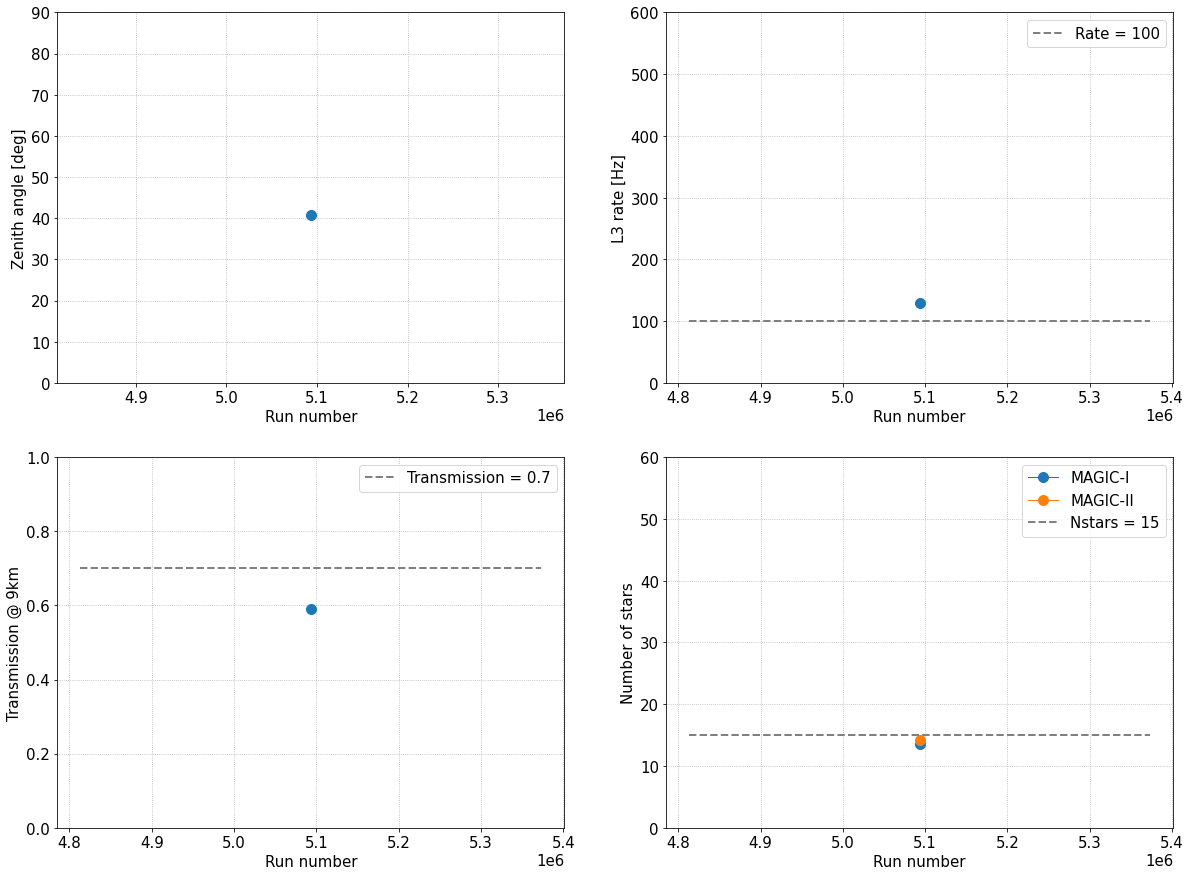


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_11_18/Out.root
Observation IDs: [5093174 5093175]
--> [ True  True]
good runs = 2, bad runs = 0



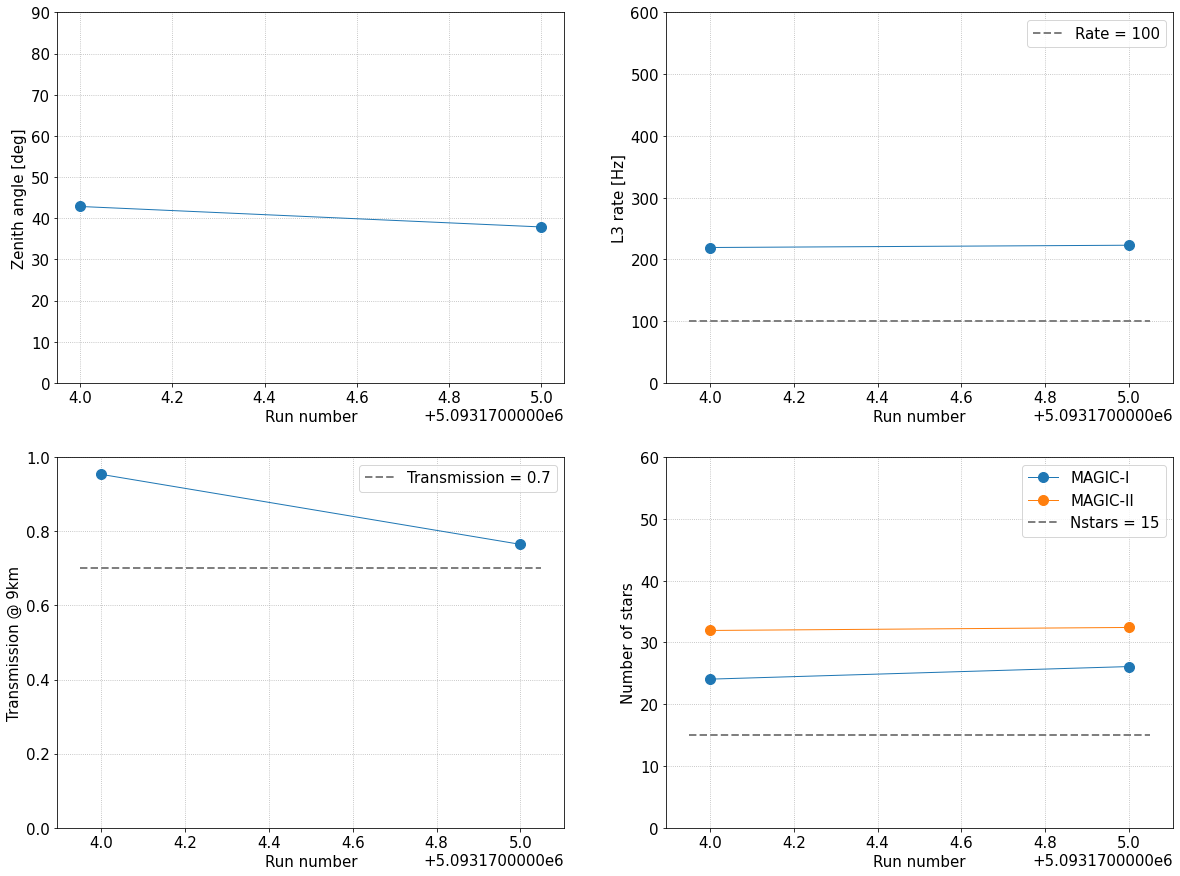


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_11_19/Out.root
Observation IDs: [5093231 5093232]
--> [False False]
good runs = 0, bad runs = 2



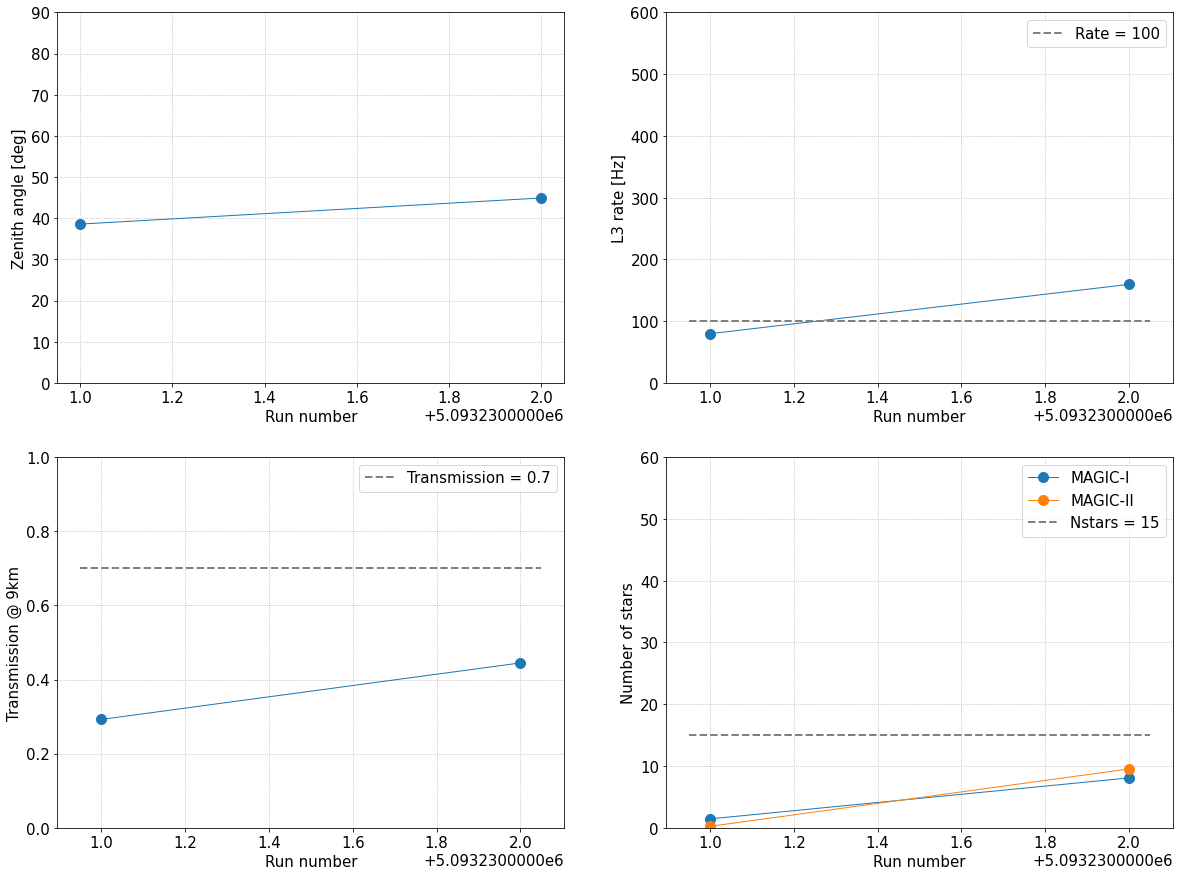


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_11_20/Out.root
Observation IDs: [5093270 5093271]
--> [False False]
good runs = 0, bad runs = 2



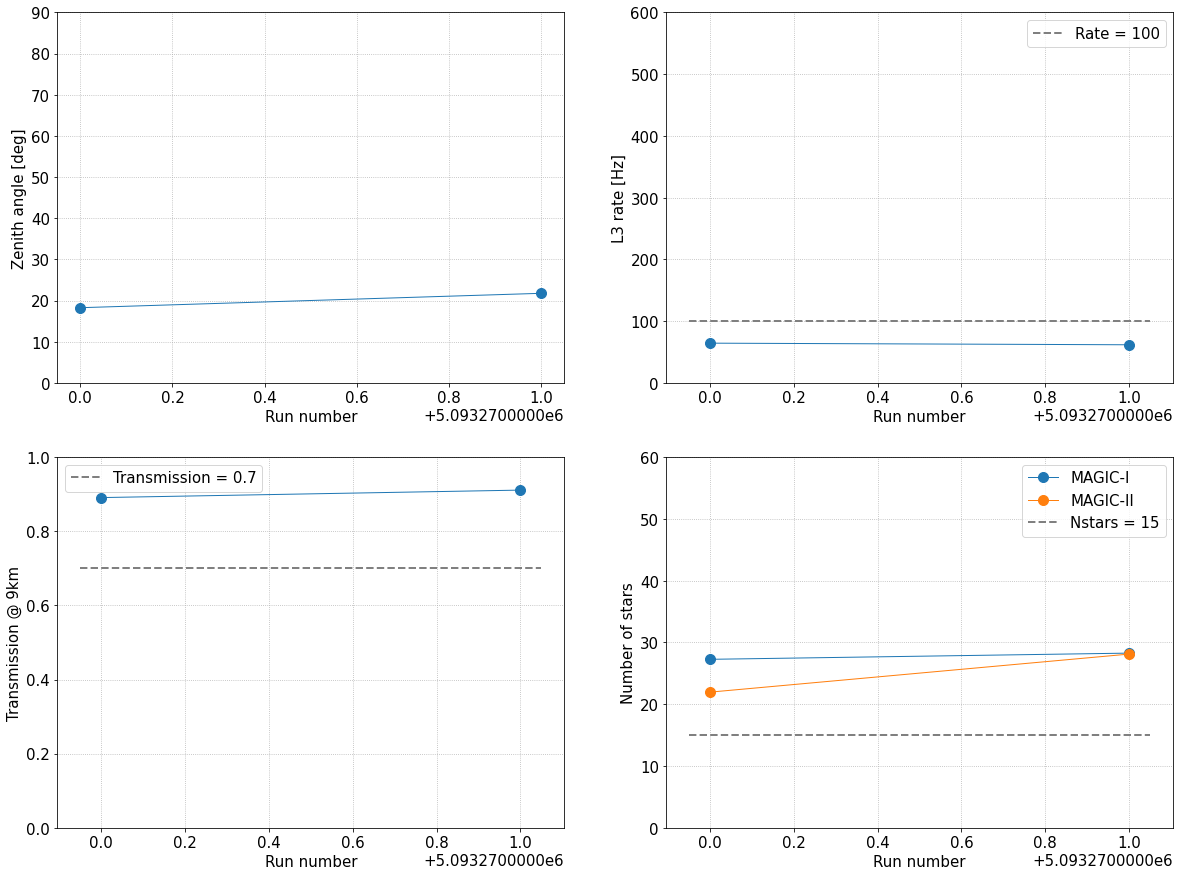


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_12_07/Out.root
Observation IDs: [5093491 5093495 5093497]
--> [ True False False]
good runs = 1, bad runs = 2



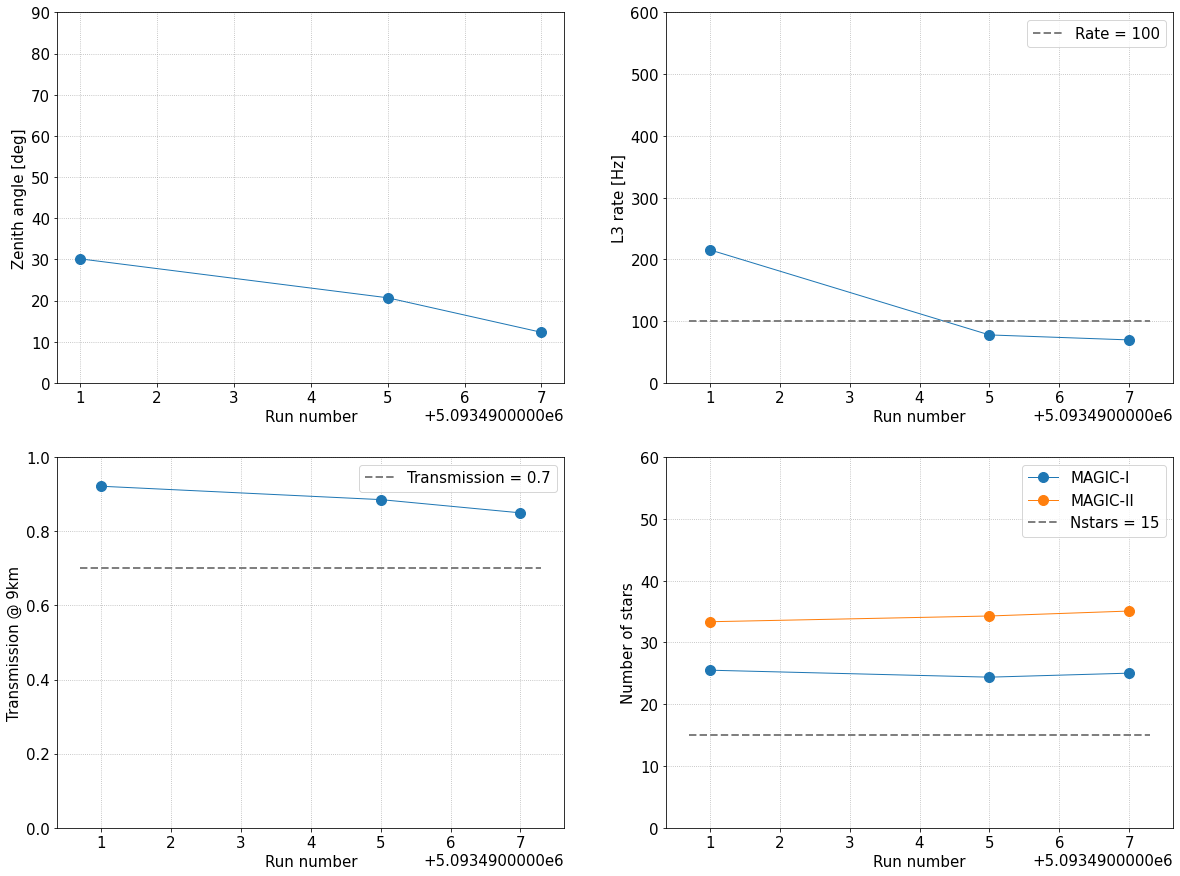


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_12_13/Out.root
Observation IDs: [5093663 5093664]
--> [ True  True]
good runs = 2, bad runs = 0



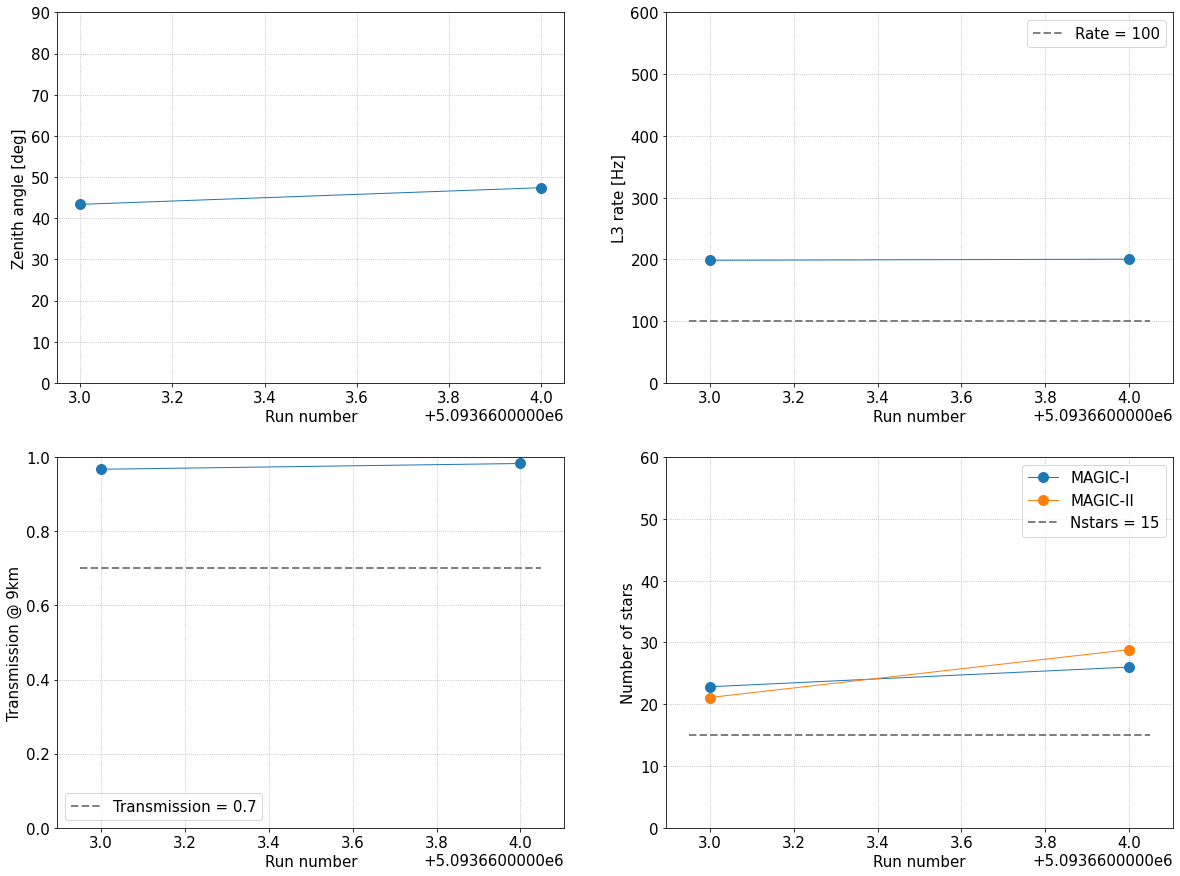


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_12_15/Out.root
Observation IDs: [5093711 5093712 5093713 5093714]
--> [ True  True  True  True]
good runs = 4, bad runs = 0



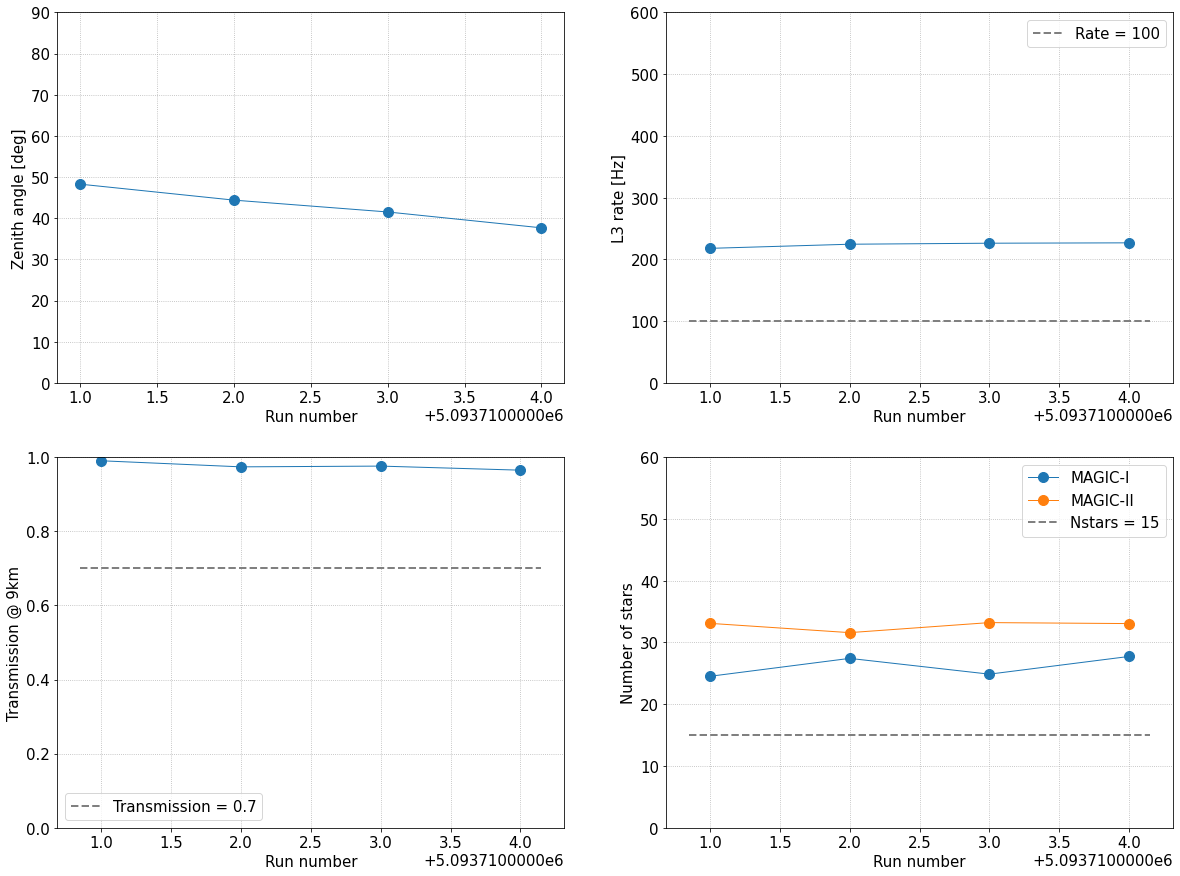


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2020_12_22/Out.root
Observation IDs: [5094024 5094025 5094028]
--> [ True  True False]
good runs = 2, bad runs = 1



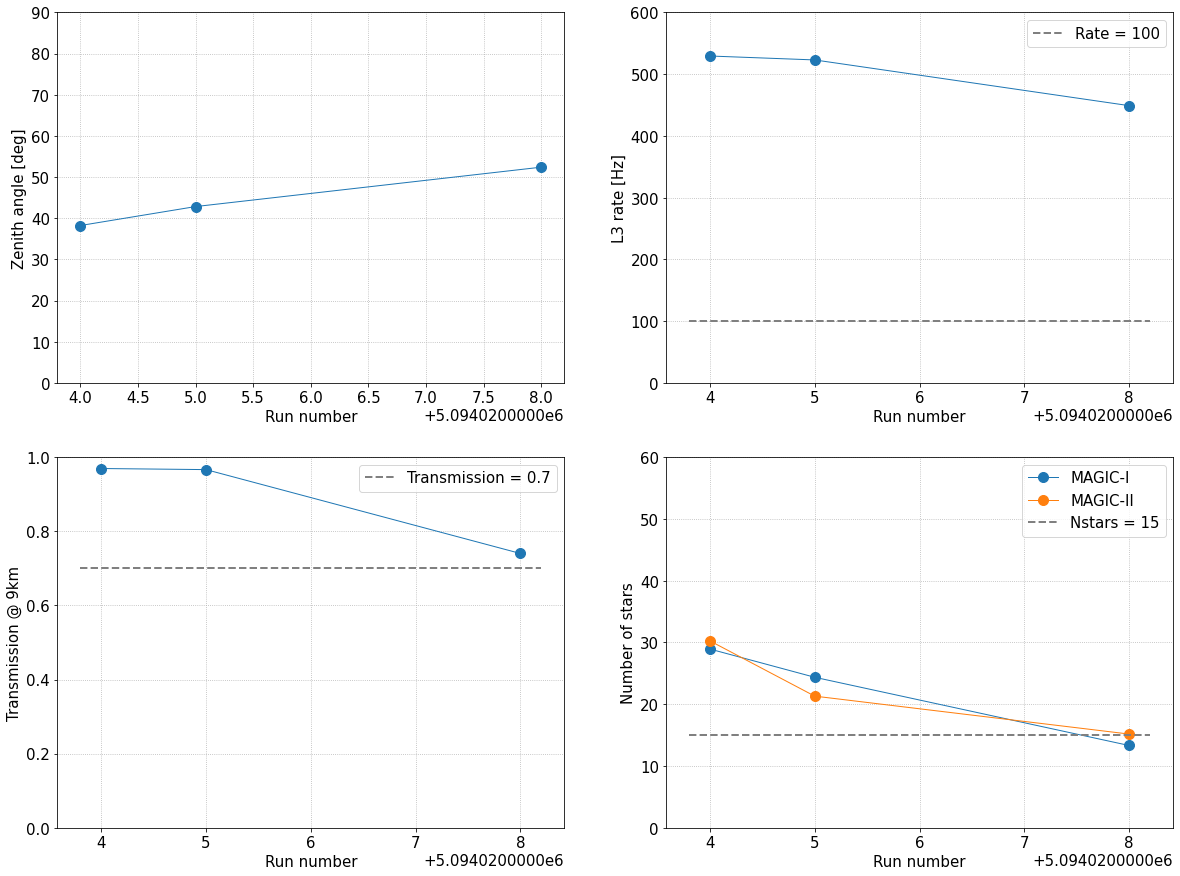


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2021_02_13/Out.root
Observation IDs: [5094483 5094484 5094485 5094486 5094487 5094488]
--> [ True  True  True  True  True  True]
good runs = 6, bad runs = 0



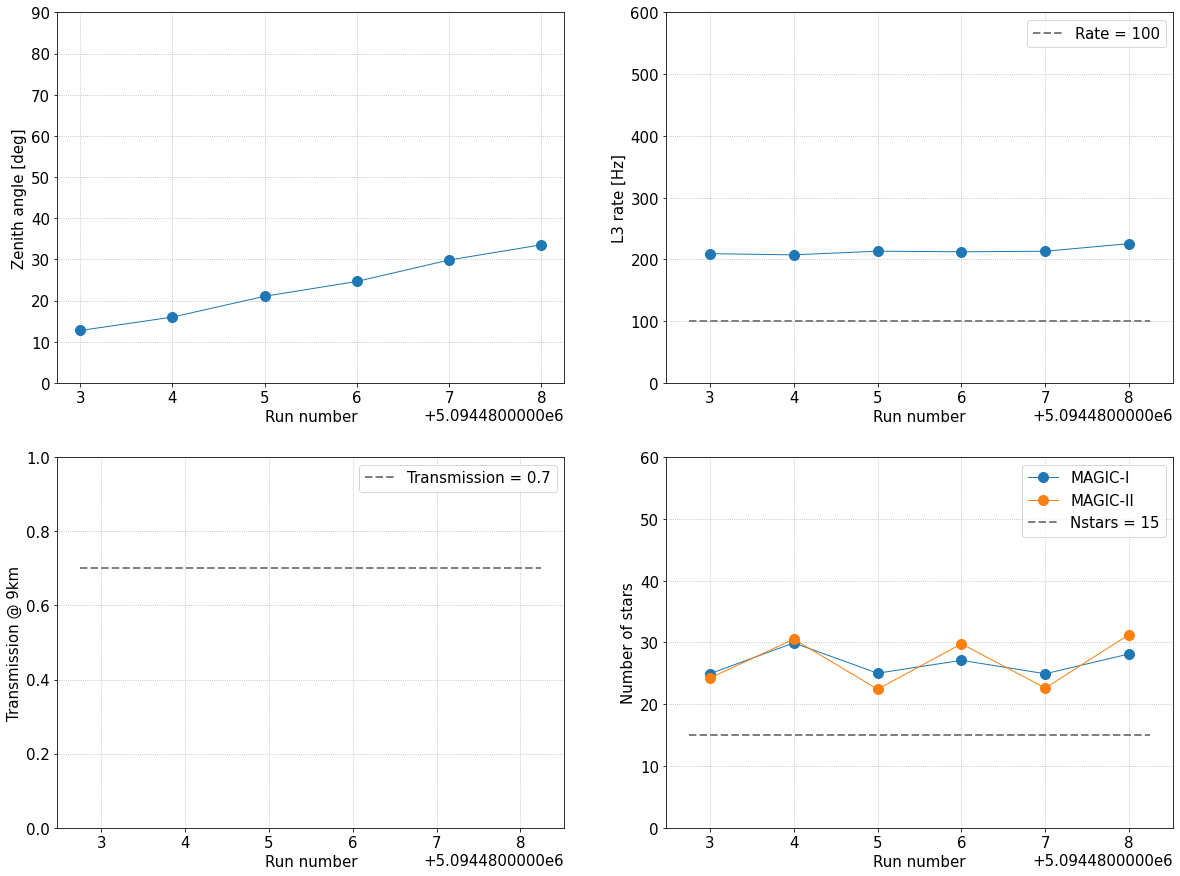


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2021_03_11/Out.root
Observation IDs: [5095077 5095078 5095079]
--> [ True False False]
good runs = 1, bad runs = 2



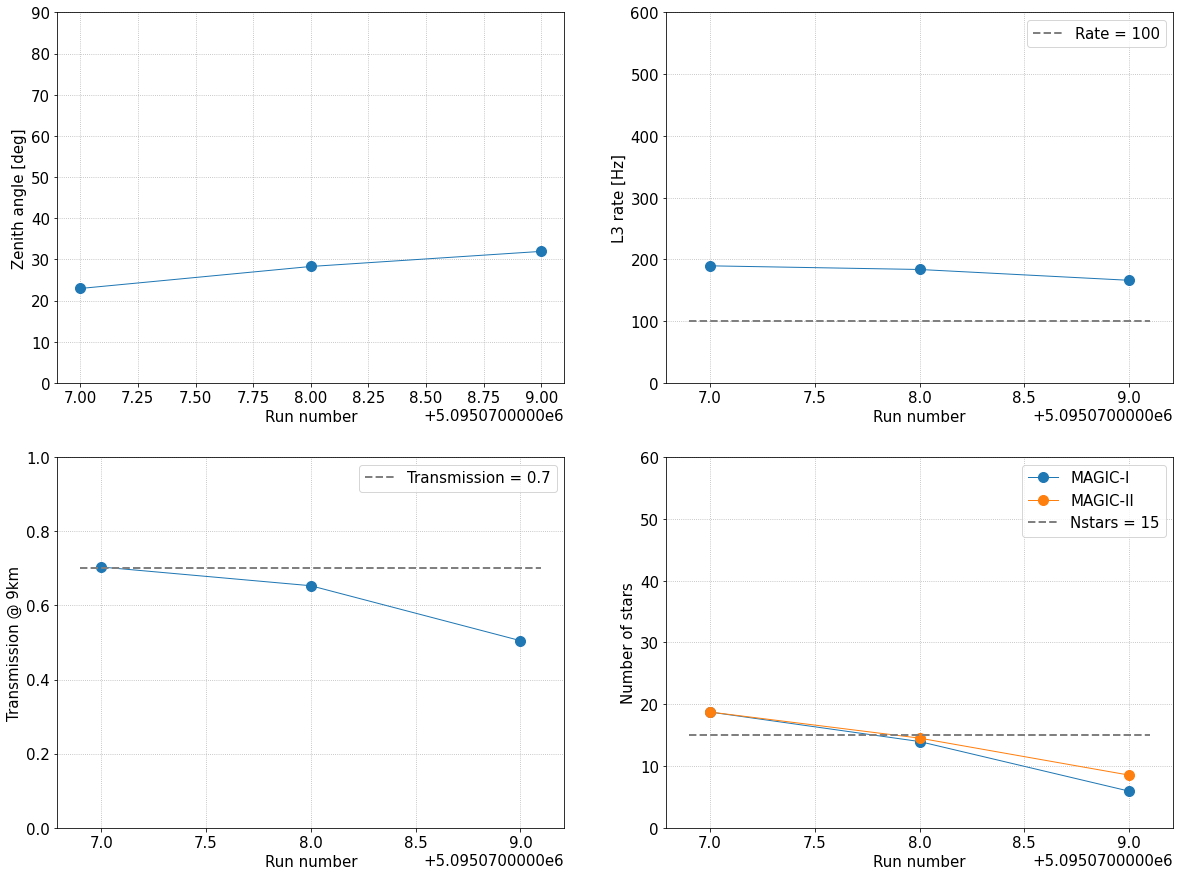


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2021_03_13/Out.root
Observation IDs: [5095173 5095174 5095177 5095178 5095181 5095182]
--> [False  True  True  True  True  True]
good runs = 5, bad runs = 1



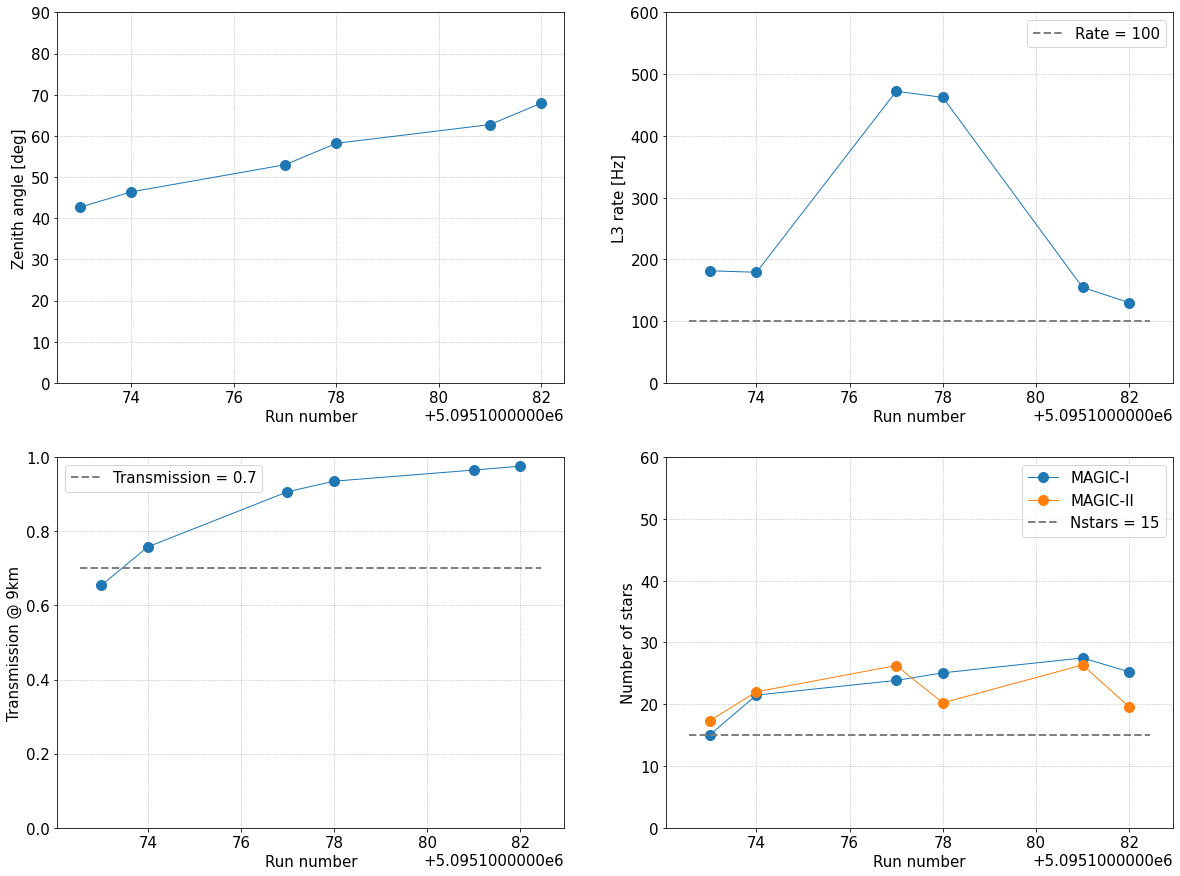


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2021_03_15/Out.root
Observation IDs: [5095266 5095268 5095271 5095272 5095273 5095277 5095278 5095281]
--> [ True  True  True  True  True  True  True  True]
good runs = 8, bad runs = 0



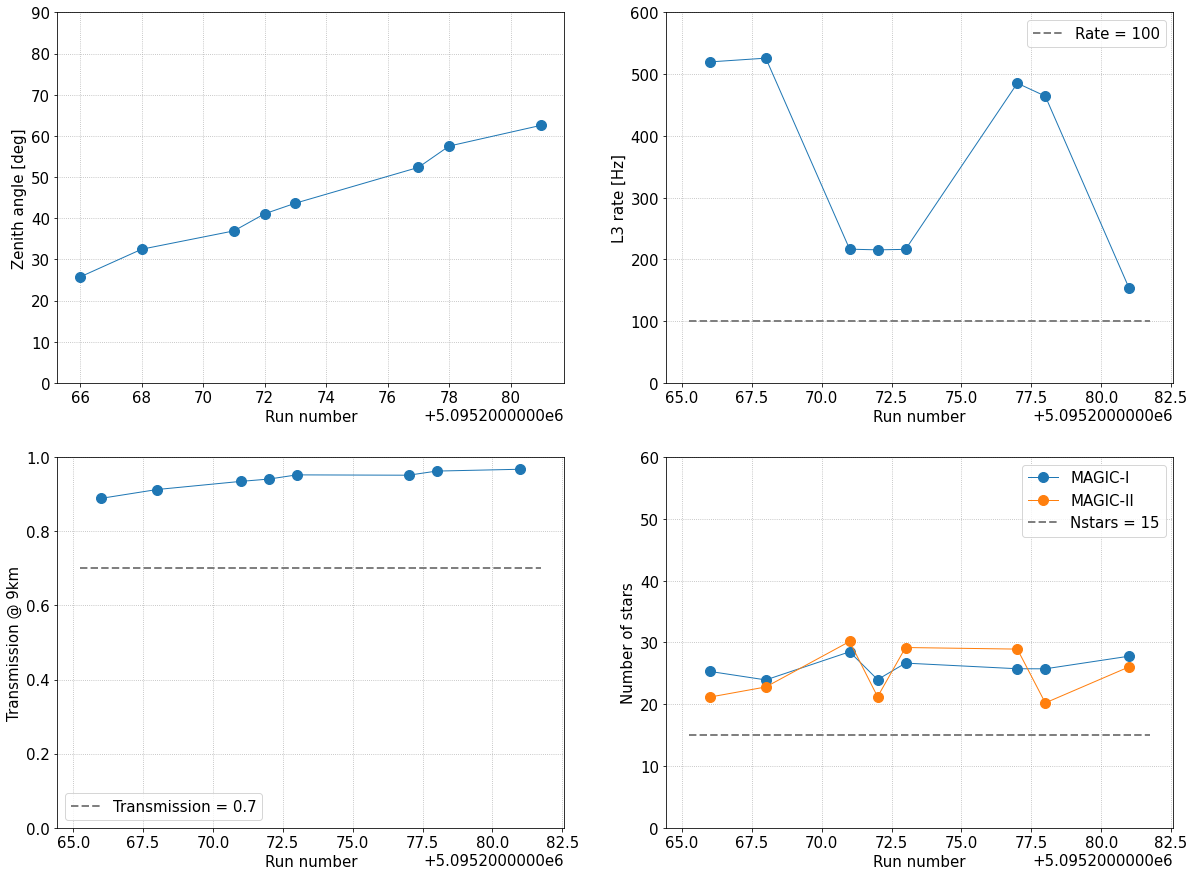


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2021_03_17/Out.root
Observation IDs: [5095376 5095380 5095381 5095382 5095383]
--> [ True  True  True  True  True]
good runs = 5, bad runs = 0



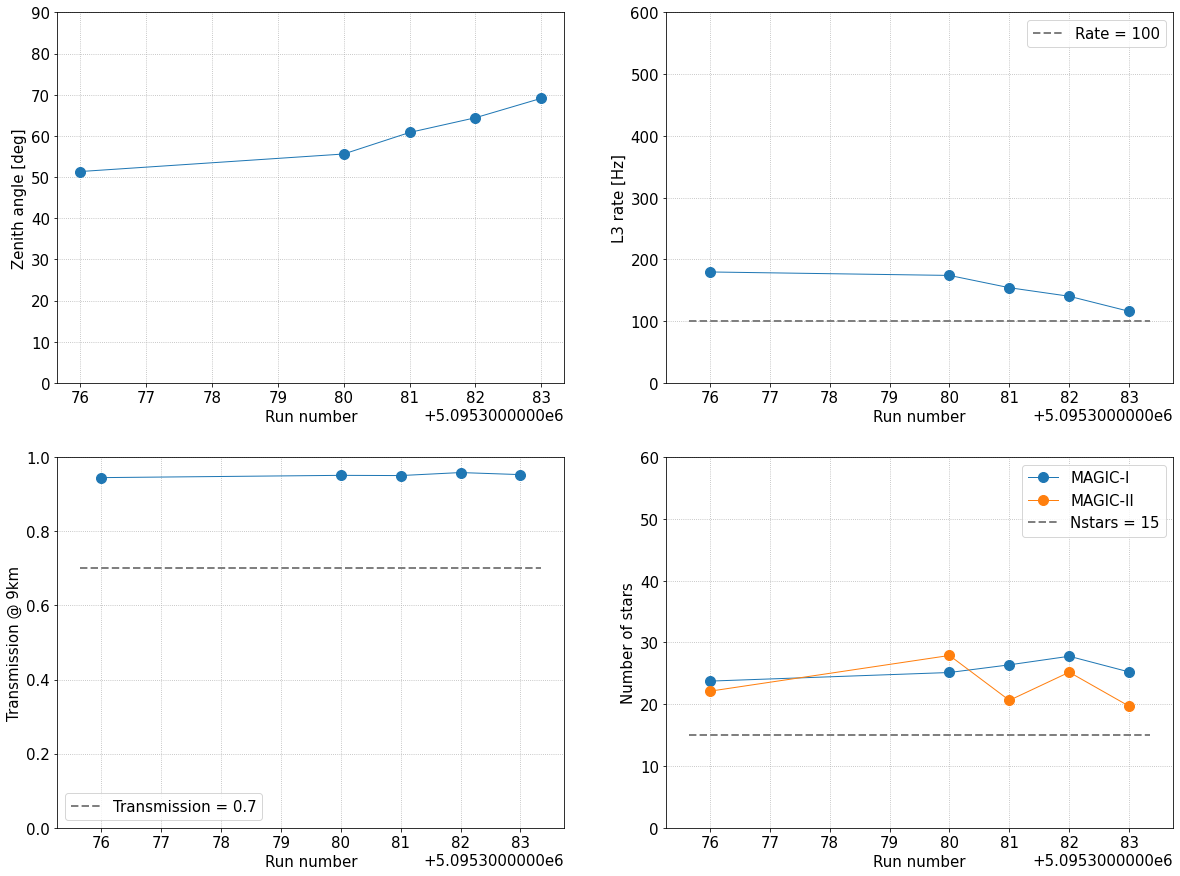


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2021_08_13/Out.root
Observation IDs: [5099235 5099236]
--> [False False]
good runs = 0, bad runs = 2



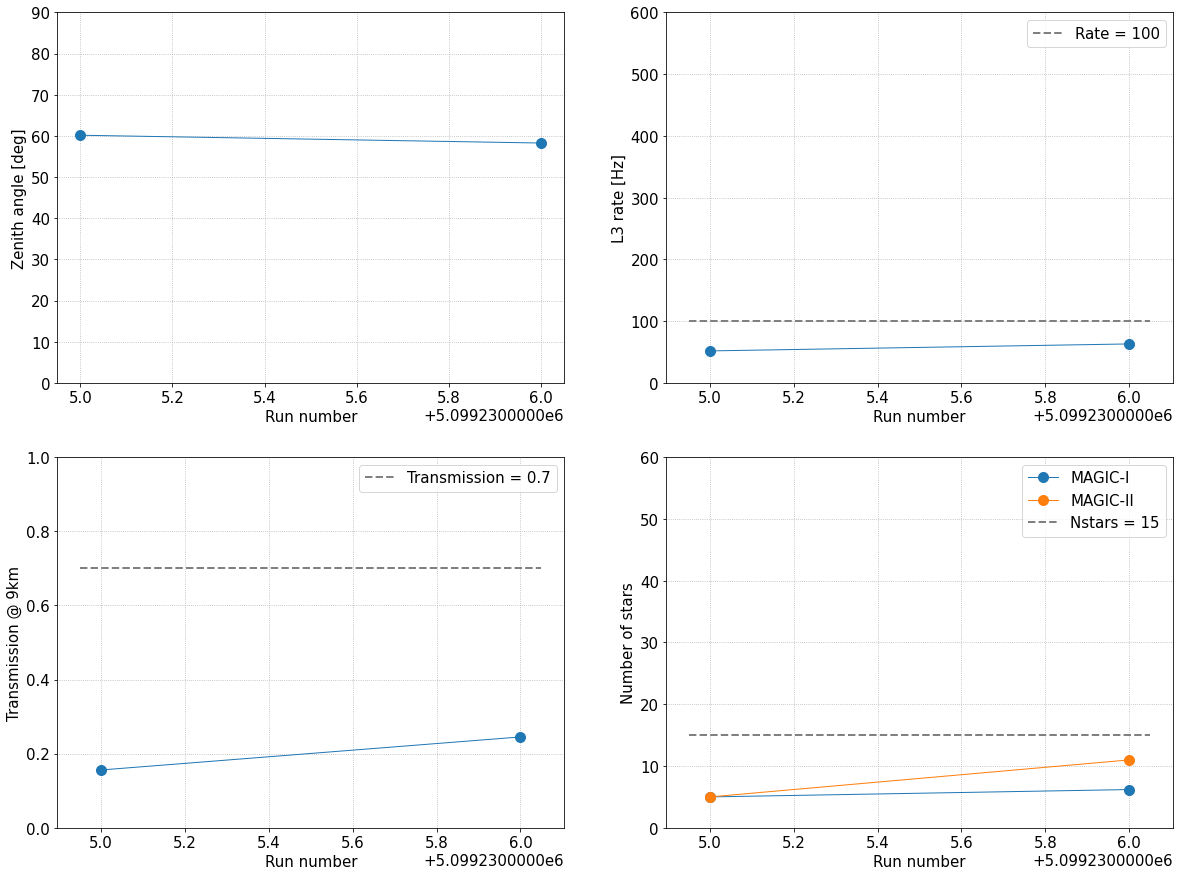


/home/yoshiki.ohtani/combined_analysis/real/CrabNebula/data_check/check_data_quality/data/2021_08_14/Out.root
Observation IDs: [5099261]
--> [False]
good runs = 0, bad runs = 1



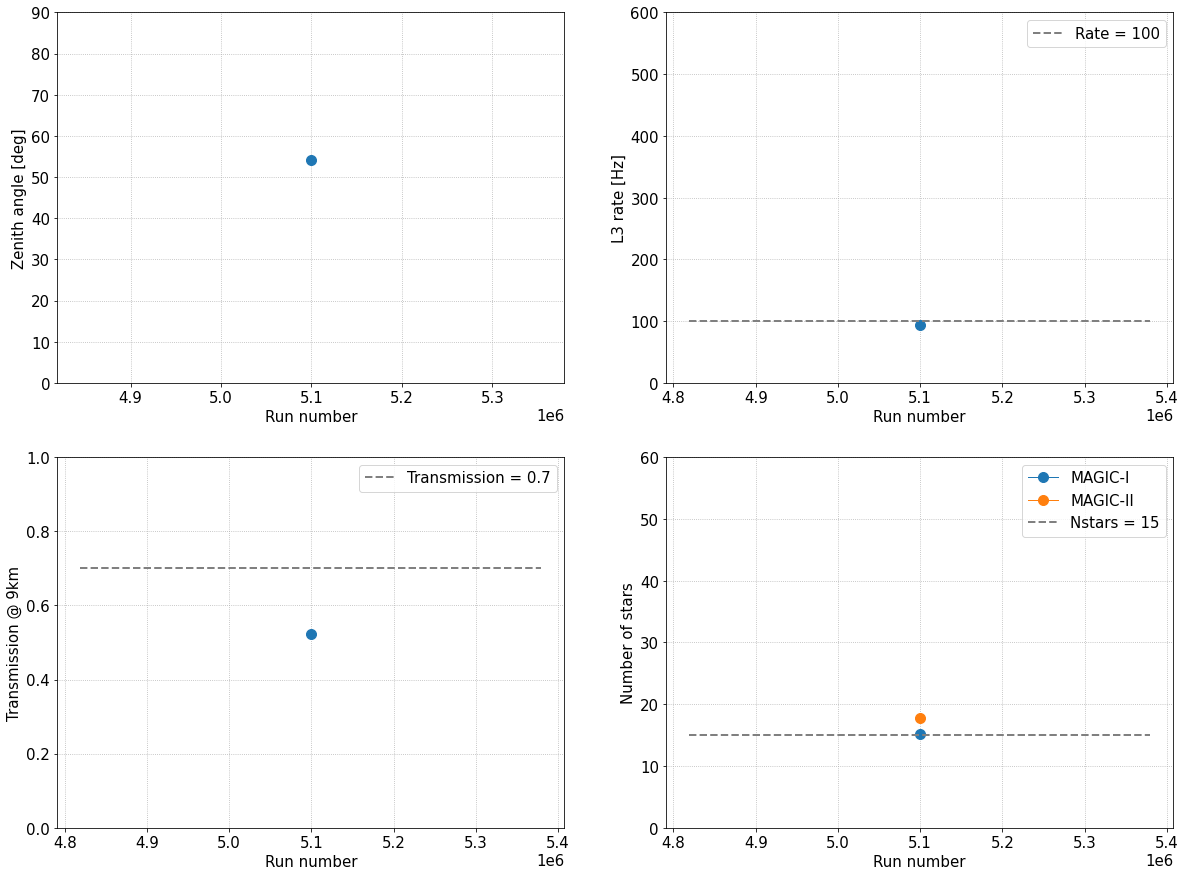


=== Summary ===

Observation IDs of good quality data:

5093174 5093175 5093491 5093663 5093664 5093711 5093712 5093713 5093714 5094024 5094025 5094483 5094484 5094485 5094486 5094487 5094488 5095077 5095174 5095177 5095178 5095181 5095182 5095266 5095268 5095271 5095272 5095273 5095277 5095278 5095281 5095376 5095380 5095381 5095382 5095383

Observation IDs of bad quality data:

5093152 5093231 5093232 5093270 5093271 5093495 5093497 5094028 5095078 5095079 5095173 5099235 5099236 5099261


In [50]:
for file in glob.glob(f'{work_dir}/figs/data_quality_*'):
    os.remove(file)
    
good_obs_ids = np.array([])
bad_obs_ids = np.array([])
    
for path in paths_list:

    print(f'\n{path}')
    
    date = re.findall('.*(\d{4}_\d{2}_\d{2}).*', path)[0]

    with uproot.open(path) as f:

        obs_ids = np.array(f['RunSum;1']['MRunSummary_1/fRunNumber'].array())
        zeniths = np.array(f['RunSum;1']['MRunSummary_1/fZd'].array())
        transmissions = np.array(f['RunSum;1']['MRunSummary_1/fAerosolTrans9km'].array())
        rates = np.array(f['RunSum;1']['MRunSummary_1/fL3Rate'].array())

        nstars = {
            1: np.array(f['RunSum;1']['MRunSummary_1/fNumStars'].array()),
            2: np.array(f['RunSum;1']['MRunSummary_2/fNumStars'].array())
        }

    # --- apply the quality cuts ---
    condition_trans = (transmissions <= 0.1) | (transmissions >= quality_cuts['transmission'])
    condition_nstars = (nstars[1] >= quality_cuts['nstar']) & (nstars[2] >= quality_cuts['nstar'])
    condition_rates = (rates >= quality_cuts['rate'])

    condition = (condition_trans & condition_nstars & condition_rates)

    good_obs_ids = np.append(good_obs_ids, obs_ids[condition])
    bad_obs_ids = np.append(bad_obs_ids, obs_ids[~condition])

    print(f'Observation IDs: {obs_ids}')
    print(f'--> {condition}')
    print(f'good runs = {np.sum(condition)}, bad runs = {np.sum(~condition)}\n')
    
    # --- plot the quality ---
    pyplot.figure()
    grid = (2, 2)
    
    pyplot.subplot2grid(grid, (0, 0))
    plot_zeniths(obs_ids, zeniths)
    
    pyplot.subplot2grid(grid, (1, 0))
    plot_transmissions(obs_ids, transmissions, quality_cuts['transmission'])
    
    pyplot.subplot2grid(grid, (0, 1))
    plot_rates(obs_ids, rates, quality_cuts['rate'])
    
    pyplot.subplot2grid(grid, (1, 1))
    plot_nstars(obs_ids, nstars, quality_cuts['nstar'])
    
    pyplot.savefig(f'{work_dir}/figs/data_quality_{date}.pdf')
    
    pyplot.show()
    pyplot.close()
    
print('\n=== Summary ===')
    
print(f'\nObservation IDs of good quality data:\n')
print(*good_obs_ids.astype(int))

print(f'\nObservation IDs of bad quality data:\n')
print(*bad_obs_ids.astype(int))